# SATELLITE IMAGE CLASSIFICATION 

### Import Necessary Libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from skimage.transform import resize
from glob import glob
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
from tensorflow.keras import Sequential, layers, applications
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Collect images from the path

In [12]:
cloudy = glob('cloudy/*.jpg')
desert = glob('desert/*.jpg')
green_area = glob('green_area/*.jpg')
water = glob('water/*.jpg')

In [14]:
len(cloudy)

1500

In [16]:
len(desert)

1131

In [18]:
len(green_area)

1500

In [20]:
len(water)

1500

### Define Classes and Corresponding Labels

In [23]:
classes = {0: 'cloudy', 1: 'desert', 2: 'green_area', 3:'water'}

### Load and Label Images for Each Flower Category

In [26]:
images = []
labels = []

for i in cloudy:
    img = plt.imread(i)
    images.append(img)
    labels.append(0)

for i in desert:
    img = plt.imread(i)
    images.append(img)
    labels.append(1)

for i in green_area:
    img = plt.imread(i)
    images.append(img)
    labels.append(2)

for i in water:
    img = plt.imread(i)
    images.append(img)
    labels.append(3)

### Plot few Images

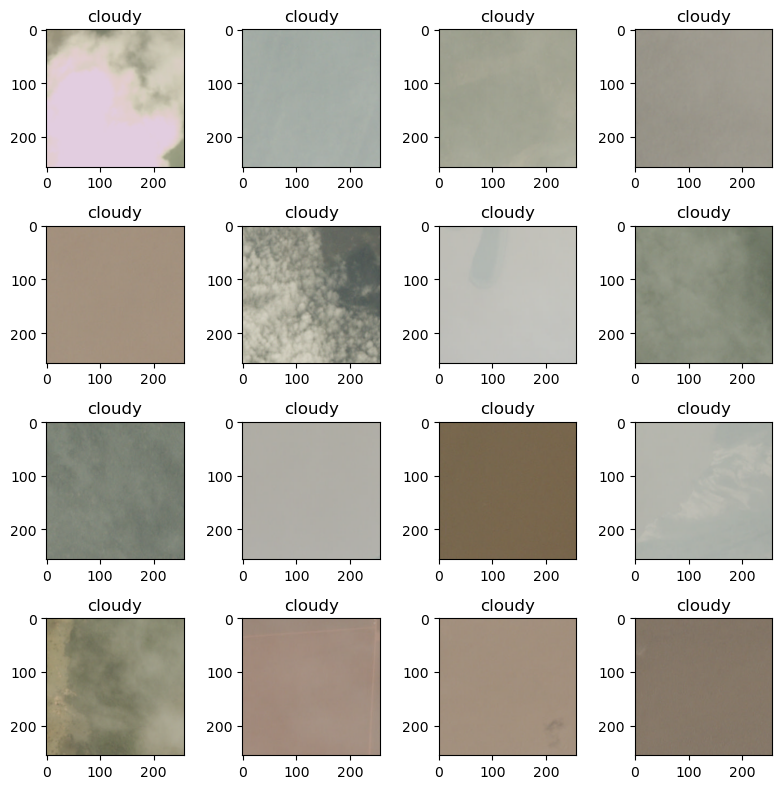

In [29]:
plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(classes[labels[i]])
plt.tight_layout()

### Shuffle the Images

In [31]:
images, labels = shuffle(images,labels)

### Plot some of the images after shuffle

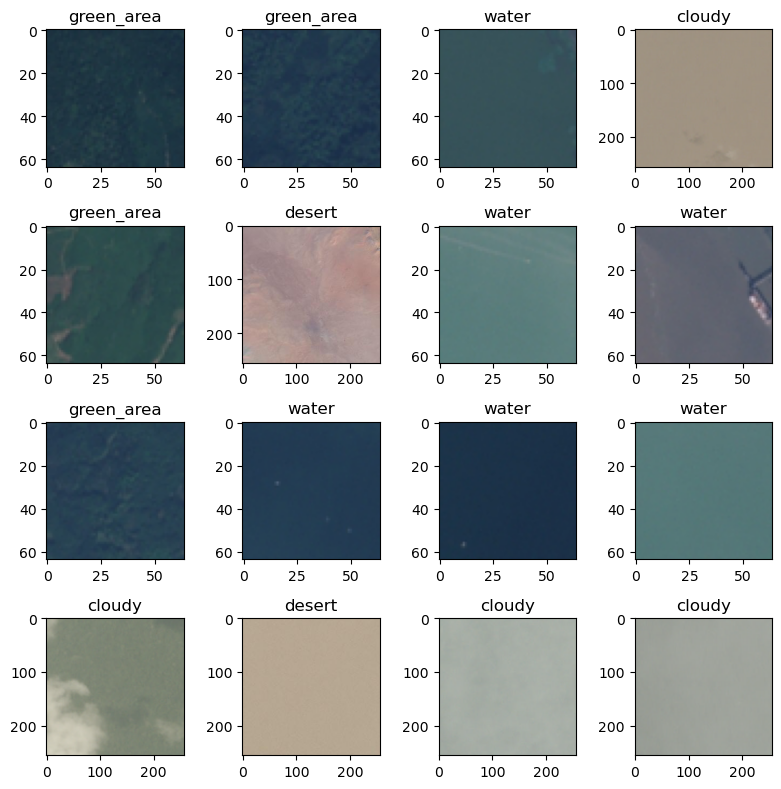

In [33]:
plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(classes[labels[i]])
plt.tight_layout()

### Resize Images to MobileNetV2 Input Shape (224,224,3)

In [35]:
x = []

for i in images:
    x.append(resize(i,(224,224,3)))

### Plot some of the Images after resizing

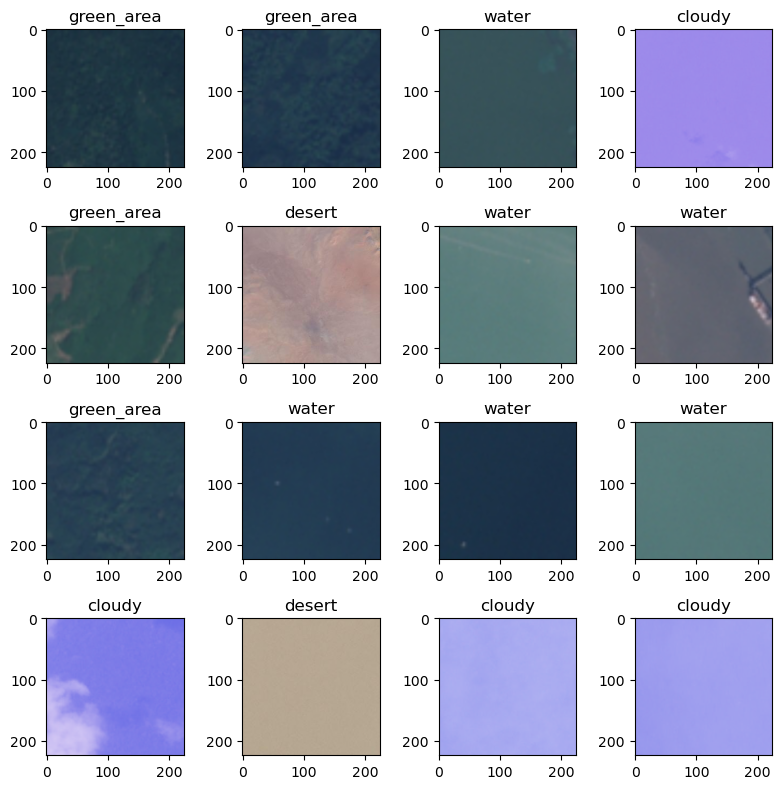

In [37]:
plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x[i], cmap='gray')
    plt.title(classes[labels[i]])
plt.tight_layout()

### Convert image and label datatypes from list to Numpy array

In [39]:
x = np.array(x)
y = np.array(labels)

### Convert Images and Labels to NumPy Arrays

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [42]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

### Load Pre-trained MobileNetV2 Feature Extractor Model

In [44]:
hub.load(feature_extractor_model)

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x17ca6a71400>

### Instantiate MobileNetV2 without Top Layer as Feature Extractor

In [46]:
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape =(224,224,3), trainable = False
)

### Build Transfer Learning Model using MobileNetV2 Feature Extractor

In [48]:
from tensorflow import keras

In [49]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16,(3,3), activation='relu', input_shape = (224,224,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(32,(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(6, activation='softmax')
])

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile Transfer Learning Model

In [53]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

### Train the Model

In [55]:
model.fit(x_train, y_train, epochs = 10, validation_split = 0.2, batch_size = 16)

Epoch 1/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 99s 389ms/step - accuracy: 0.7242 - loss: 1.0273 - val_accuracy: 0.8191 - val_loss: 0.4398
Epoch 2/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 72s 316ms/step - accuracy: 0.8903 - loss: 0.2514 - val_accuracy: 0.8701 - val_loss: 0.2885
Epoch 3/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 79s 303ms/step - accuracy: 0.9051 - loss: 0.1977 - val_accuracy: 0.9267 - val_loss: 0.1716
Epoch 4/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 68s 302ms/step - accuracy: 0.9240 - loss: 0.1569 - val_accuracy: 0.9345 - val_loss: 0.1534
Epoch 5/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 69s 304ms/step - accuracy: 0.9162 - loss: 0.1929 - val_accuracy: 0.9090 - val_loss: 0.1955
Epoch 6/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 69s 305ms/step - accuracy: 0.9074 - loss: 0.1819 - val_accuracy: 0.9290 - val_loss: 0.1548
Epoch 7/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 68s 303ms/step - accuracy: 0.9142 - loss: 0.1880 - val_accuracy: 0.9456 - val_loss: 0.1372
Epoch 8/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 68s 301ms/step - accuracy: 0.9322 - loss: 0

### Model Prediction on Test Data

In [57]:
y_pred = model.predict(x_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step


In [58]:
y_pred = [np.argmax(i) for i in y_pred]

### Calculate Accuracy Score

In [61]:
accuracy_score(y_test,y_pred)

0.9121561668145519

### Plot confusion matrix on heatmap

<Axes: >

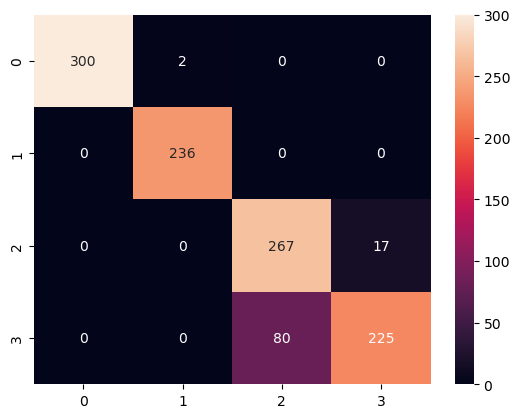

In [64]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd')

***